# MODEL 1

This notebook shows the implementation of the model 1. See the documenation for further details. 

#### The preprocessing we apply is the strict one; 
#### The dataset considered is just the article3 (train+test20);
#### The Doc2vec model is trained on 9-folds of the dataset (train+test20);
#### The SVM is trained by applying a 10-fold cross-validation which means we trained the SMV on  9-folds of the dataset (train+test20) and tested on the remaining 1-fold. 

In [1]:
import os
import sys
import shutil
import random
import re
import regex
import string
from random import shuffle
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import KFold
from gensim import models
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from sklearn import svm, metrics
import matplotlib.pyplot as plt
from nltk.stem import PorterStemmer
from sklearn.preprocessing import normalize
from module_preprocessing import apply_preprocessing, merge_dataset
from ast import literal_eval

random_seed = [
    1234, 232345, 334456, 454567, 567448, 67839, 9822276, 763454, 644543,
    3454421
]

In [2]:
def create_raw_dataset(path, art):
    '''
     This function creates a raw dataset, which consists of two columns: "raw_text" and "tag".
     
      Args:
         df (DataFrame): an empty dataframe.
         path (string): the folder where the files are.
      Returns :
         (DataFrame) a Dataframe with shape (2,) . 
     '''
    df = pd.DataFrame()
    try:
        for x in ["/violation/", "/non-violation/"]:
            for filename in os.listdir(path + art + x)[1:]:
                dic = {}
                with open(path + art + x + filename, "rt") as f:
                    dic['raw_text'] = apply_preprocessing(f.read())
                if "non-violation" in x:
                    dic['tag'] = 1  #or "nv"
                else:
                    dic['tag'] = 0
                df = df.append(dic, ignore_index=True)
    except IndexError:
        print("Index Error at ", filename)
    finally:
        df.to_csv(
            "crystal_ball_data/train_test20/raw_dataset/Article" + art +
            "_raw_dataset.csv",
            index_label="index")
        return df

In [12]:
path = "crystal_ball_data/train_test20/Article"
df = create_raw_dataset(path, str(3))

,raw_text,tag
0,"[1, case, origin, applic, russian, feder, lodg...",0.0
1,"[1, case, origin, applic, nos906, russian, fed...",0.0
2,"[1, case, origin, applic, russian, feder, lodg...",0.0
3,"[1, case, origin, applic, ukrain, lodg, court,...",0.0
4,"[1, case, origin, applic, republ, turkey, lodg...",0.0
5,"[1, case, origin, applic, russian, feder, lodg...",0.0
6,"[1, case, origin, applic, russian, feder, lodg...",0.0
7,"[1, case, origin, applic, ukrain, lodg, court,...",0.0
8,"[1, case, origin, applic, russian, feder, lodg...",0.0
9,"[1, case, origin, applic, russian, feder, lodg...",0.0


In [2]:
print("loading raw dataset...")
dataframe = pd.read_csv(
    "crystal_ball_data/train_test20/raw_dataset/Article3_raw_dataset.csv",
    index_col='index')
dataframe.raw_text = dataframe.raw_text.apply(literal_eval)

dataframe.head(10)

loading raw dataset...


,raw_text,tag
index,,
0,"[1, case, origin, applic, russian, feder, lodg...",0.0
1,"[1, case, origin, applic, nos906, russian, fed...",0.0
2,"[1, case, origin, applic, russian, feder, lodg...",0.0
3,"[1, case, origin, applic, ukrain, lodg, court,...",0.0
4,"[1, case, origin, applic, republ, turkey, lodg...",0.0
5,"[1, case, origin, applic, russian, feder, lodg...",0.0
6,"[1, case, origin, applic, russian, feder, lodg...",0.0
7,"[1, case, origin, applic, ukrain, lodg, court,...",0.0
8,"[1, case, origin, applic, russian, feder, lodg...",0.0


In [3]:
def create_vector_dataset(df, model, df_vector=pd.DataFrame()):
    '''
     This function creates a well structured dataset, which consists of n columns: n features and the tag.
     It transforms strings to vectors through the model Doc2Vec.
     which consists of n columns: n features and the tag. 
      Args:
         df (DataFrame): an semi-structured dataframe, look at create_raw_dataset.  
         model (Doc2Vec) : a trained Doc2Vec model.
         df_vector (DataFrame): an initialized dataframe with shape (n_features+1,).
      Returns :
         (DataFrame) a Dataframe with shape (n_features+1,n_samples). 
    '''

    for index, sample in df.iterrows():
        vector = model.infer_vector(doc_words=sample['raw_text'], steps=20)
        dic = {}
        for i in range(len(vector)):
            dic['y_' + str(i)] = vector[i]
        dic['tag'] = sample['tag']
        df_vector = df_vector.append(dic, ignore_index=True)
    df_vector.loc[:, 'y_0':'y_' + str(len(vector) - 1)] = normalize(
        df_vector.loc[:, 'y_0':'y_' + str(len(vector) - 1)], norm='l2', axis=0)
    return df_vector

In [4]:
def main(df, n_shuffles=10, n_splits=10, vector_size=100, verbose=0):

    matr_accuracy = np.zeros((n_shuffles, n_splits), dtype=float)
    if verbose >= 0:
        print("SEEDs: ", random_seed)

    for i in range(n_shuffles):

        if verbose >= 1:
            print("\n\n_______Shuffle number " + str(i) + "_______\nSEED:" +
                  str(random_seed[i]))
        random.seed(random_seed[i])
        df = df.sample(
            frac=1, random_state=random_seed[i]).reset_index(drop=True)
        if verbose >= 2:
            print("SHUFFLED DATASET: \n")
            print(df.head(3))
            print(df.shape)
        kf = KFold(n_splits=n_splits)
        count = 0
        for train_index, test_index in kf.split(df):
            if verbose >= 1:
                print("_______cross validation round: " + str(count) +
                      "_______")
            if verbose >= 3: print("test indexes: ", test_index)

            df_test = df.loc[test_index[0]:test_index[len(test_index) - 1]]
            df_train = df.drop(df.index[test_index])
            if verbose >= 3:
                print("TEST SET: ", df_test)
                print("shape: ", df_test.shape)
                print("TRAIN SET:", df_train.head(10))
                print("shape: ", df_train.shape)

            documents = []
            for index, sample in df_train.iterrows():
                documents.append(
                    TaggedDocument(
                        words=sample['raw_text'], tags=[sample['tag']]))
            if verbose >= 3:
                print("TAGGED documents: ", documents[0], "\nlen documents: ",
                      len(documents))
            model_D2V = Doc2Vec(
                documents,
                vector_size=vector_size,
                epochs=20,
                min_count=1,
                workers=os.cpu_count())
            #model_D2V.save("model_D2V/sh"+str(count)+"_cv"+str(i))

            df_vector = create_vector_dataset(df_train, model_D2V)
            df_test_vector = create_vector_dataset(df_test, model_D2V)
            if verbose >= 2:
                print("TEST SET VECTOR: ", df_test_vector.head(10))
                print("shape: ", df_test_vector.shape)
                print("TRAIN SET:", df_vector.head(10))
                print("shape: ", df_vector.shape)

            clf_svm = svm.SVC(kernel='linear', C=1)
            clf_svm.fit(
                df_vector.loc[:, 'y_0':'y_' + str(vector_size - 1)].values,
                df_vector.loc[:, 'tag'].values)

            predictions = clf_svm.predict(
                df_test_vector.loc[:, 'y_0':'y_' +
                                   str(vector_size - 1)].values)
            tag_test = df_test_vector.loc[:, 'tag'].values
            acc = metrics.accuracy_score(tag_test, predictions)
            if verbose >= 0:
                print("ACCURACY:", acc)
                #print("Precision:",metrics.precision_score(tag_test, predictions))
                #print("Recall:",metrics.recall_score(tag_test, predictions))

            matr_accuracy[i][count] = acc
            count += 1

    return matr_accuracy

Note: 
* Be sure you are in the same folder contaning the Crystal Ball data set.
* You might need to install some libraries, here's the list: 
{'json', 'os', 'string', 'shutil', 'random', 'regex', 'nltk', 're', 'sys'}
SEEDs:  [1234, 232345, 334456, 454567, 567448, 67839, 9822276, 763454, 644543, 3454421]


_______Shuffle number 0_______
SEED:1234
_______cross validation round: 0_______
ACCURACY: 0.7464788732394366
_______cross validation round: 1_______
ACCURACY: 0.7464788732394366
_______cross validation round: 2_______
ACCURACY: 0.6901408450704225
_______cross validation round: 3_______
ACCURACY: 0.6901408450704225
_______cross validation round: 4_______
ACCURACY: 0.7605633802816901
_______cross validation round: 5_______
ACCURACY: 0.7887323943661971
_______cross validation round: 6_______
ACCURACY: 0.7746478873239436
_______cross validation round: 7_______
ACCURACY: 0.7183098591549296
_______cross validation round: 8_______
ACCURACY: 0.7323943661971831
_______cross validation round:

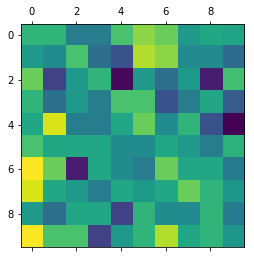

In [5]:
if __name__ == "__main__":
    print(
        "Note: \n* Be sure you are in the same folder contaning the Crystal Ball data set.\n* You might need to install some libraries, here's the list: "
    )
    print(set(sys.modules) & set(globals()))
    %time matr = main(dataframe,n_shuffles=10,n_splits=10,vector_size=100,verbose=1)
    print(matr.__str__())
    plt.matshow(matr)
    plt.show()

mean:  0.7211187122736418
min:  0.5857142857142857
max:  0.8309859154929577


array([0.73764588, 0.71784708, 0.69402414, 0.70796781, 0.71209256,
       0.72498994, 0.72631791, 0.73762575, 0.70800805, 0.74466801])

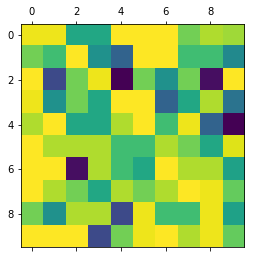

In [7]:
plt.matshow(matr, vmin=0.6, vmax=0.75)

print("mean: ", matr.mean())
print("min: ", matr.min())
print("max: ", matr.max())
matr.mean(1)